In [3]:
import joblib
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


In [4]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


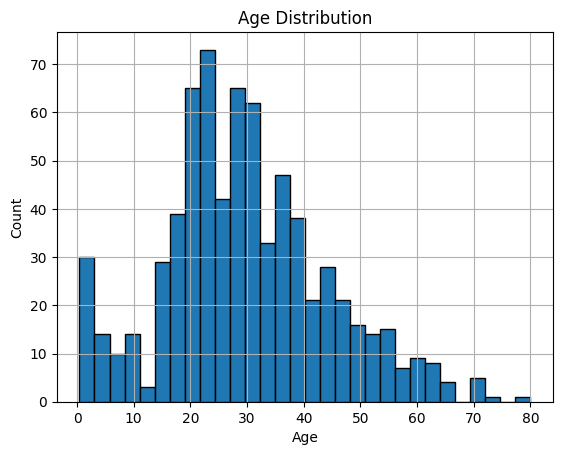

In [5]:
df['Age'].hist(bins=30, edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

In [6]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df=df.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)

In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [11]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

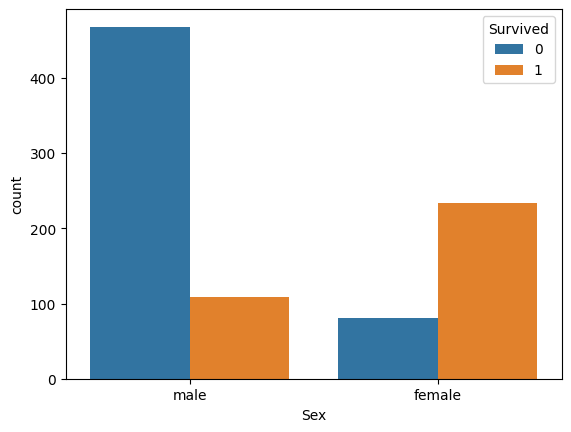

In [12]:
sns.countplot(data=df, x='Sex', hue='Survived')


In [13]:
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])
label = LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

<Axes: xlabel='Age', ylabel='Fare'>

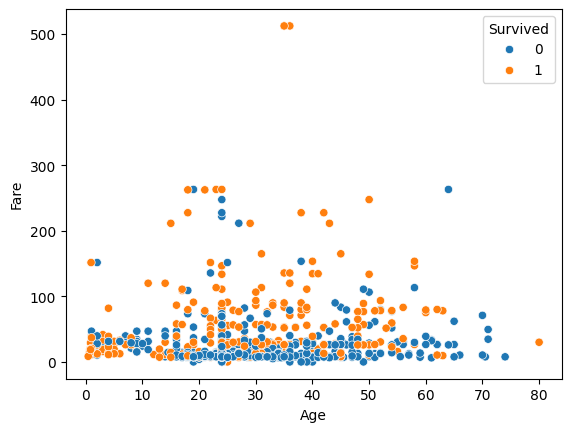

In [14]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')

<Axes: >

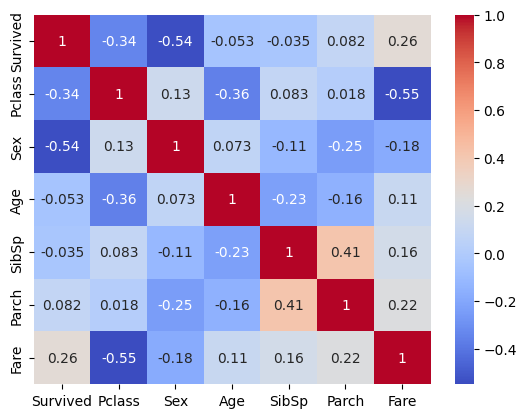

In [15]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

C:\Users\Hashir\AppData\Local\Temp\ipykernel_7848\1369812715.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], palette='coolwarm')  # ← note x instead of y
C:\Users\Hashir\AppData\Local\Temp\ipykernel_7848\1369812715.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], palette='coolwarm')  # ← note x instead of y
C:\Users\Hashir\AppData\Local\Temp\ipykernel_7848\1369812715.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], palette='coolwarm')  # ← note x instead of y
C:\Users\Hashir\AppData\Loca

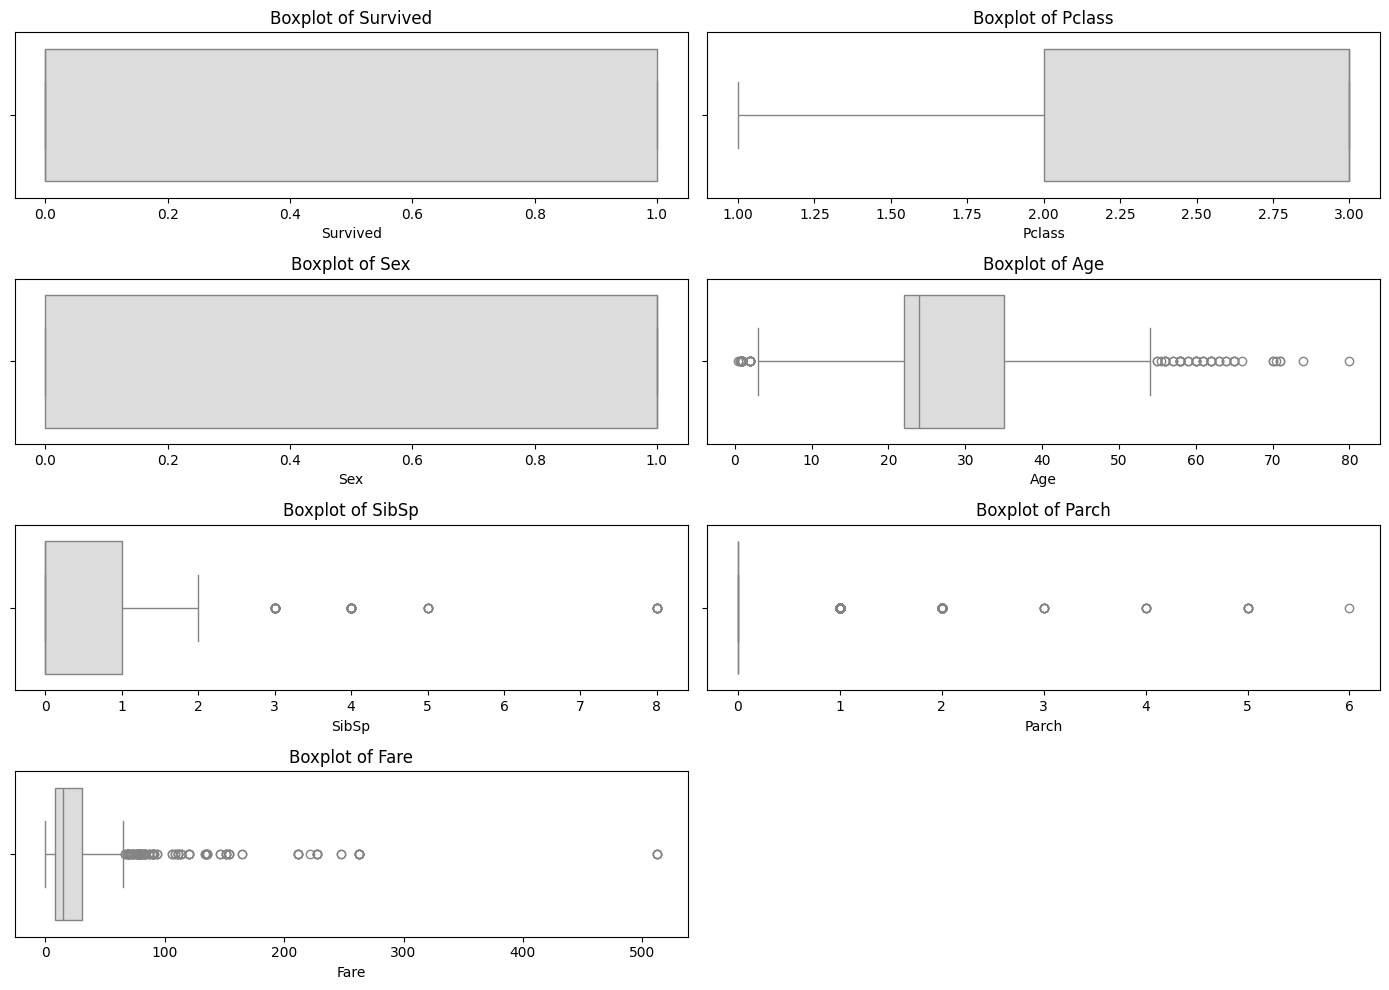

In [16]:

plt.figure(figsize=(14, 10))
for i, feature in enumerate(df, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[feature], palette='coolwarm')  # ← note x instead of y
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

In [17]:
def remove_outliers_iqr(df, features):
    df_clean = df.copy()
    for feature in features:
        Q1 = df_clean[feature].quantile(0.25)
        Q3 = df_clean[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 2 * IQR
        upper_bound = Q3 + 2 * IQR
        df_clean = df_clean[(df_clean[feature] >= lower_bound) & (df_clean[feature] <= upper_bound)]
    return df_clean

# Example usage:
features = df.columns.drop('Survived')  # remove outliers from all features except the target
df_clean = remove_outliers_iqr(df, features)

            Pipelines       
            

In [18]:
x_train, x_test, y_train, y_test = train_test_split(df_clean.drop('Survived', axis=1), df_clean['Survived'], test_size=0.15, random_state=42)

In [19]:
x_train.isna().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [21]:
from sklearn.model_selection import cross_val_score
import numpy as np

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=2))
])
knn_pipeline.fit(x_train, y_train)
knn_scores = cross_val_score(knn_pipeline, x_train, y_train, cv=5)
print("KNN Test Accuracy:", knn_pipeline.score(x_test, y_test))
print("KNN CV Scores:", knn_scores)
print("KNN CV Best:", np.max(knn_scores))
print("KNN CV Mean:", np.mean(knn_scores))
print("KNN CV Diff:", np.max(knn_scores) - np.mean(knn_scores))

nb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('nb', GaussianNB())
])
nb_pipeline.fit(x_train, y_train)
nb_scores = cross_val_score(nb_pipeline, x_train, y_train, cv=5)
print("Naive Bayes Test Accuracy:", nb_pipeline.score(x_test, y_test))
print("Naive Bayes CV Scores:", nb_scores)
print("Naive Bayes CV Best:", np.max(nb_scores))
print("Naive Bayes CV Mean:", np.mean(nb_scores))
print("Naive Bayes CV Diff:", np.max(nb_scores) - np.mean(nb_scores))

dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier())
])
dt_pipeline.fit(x_train, y_train)
dt_scores = cross_val_score(dt_pipeline, x_train, y_train, cv=5)
print("Decision Tree Test Accuracy:", dt_pipeline.score(x_test, y_test))
print("Decision Tree CV Scores:", dt_scores)
print("Decision Tree CV Best:", np.max(dt_scores))
print("Decision Tree CV Mean:", np.mean(dt_scores))
print("Decision Tree CV Diff:", np.max(dt_scores) - np.mean(dt_scores))


KNN Test Accuracy: 0.8555555555555555
KNN CV Scores: [0.79207921 0.74257426 0.79207921 0.8019802  0.83168317]
KNN CV Best: 0.8316831683168316
KNN CV Mean: 0.7920792079207921
KNN CV Diff: 0.03960396039603953
Naive Bayes Test Accuracy: 0.8222222222222222
Naive Bayes CV Scores: [0.77227723 0.73267327 0.79207921 0.77227723 0.85148515]
Naive Bayes CV Best: 0.8514851485148515
Naive Bayes CV Mean: 0.7841584158415842
Naive Bayes CV Diff: 0.06732673267326728
Decision Tree Test Accuracy: 0.8222222222222222
Decision Tree CV Scores: [0.8019802  0.68316832 0.74257426 0.75247525 0.79207921]
Decision Tree CV Best: 0.801980198019802
Decision Tree CV Mean: 0.7544554455445545
Decision Tree CV Diff: 0.04752475247524757


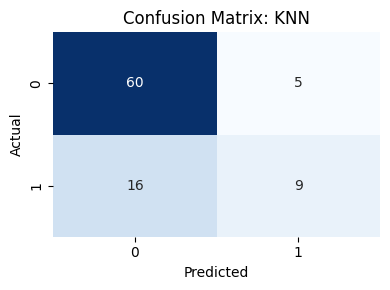

Classification Report: KNN
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        65
           1       0.64      0.36      0.46        25

    accuracy                           0.77        90
   macro avg       0.72      0.64      0.66        90
weighted avg       0.75      0.77      0.74        90



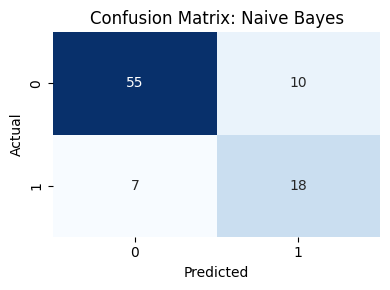

Classification Report: Naive Bayes
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        65
           1       0.64      0.72      0.68        25

    accuracy                           0.81        90
   macro avg       0.76      0.78      0.77        90
weighted avg       0.82      0.81      0.81        90



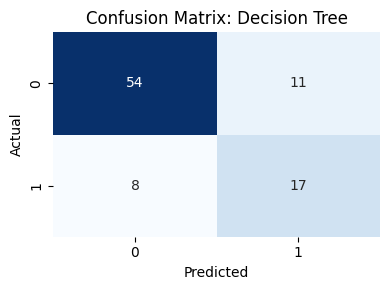

Classification Report: Decision Tree
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        65
           1       0.61      0.68      0.64        25

    accuracy                           0.79        90
   macro avg       0.74      0.76      0.75        90
weighted avg       0.80      0.79      0.79        90



In [38]:
from sklearn.model_selection import cross_val_predict

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

y_pred_knn = cross_val_predict(knn_pipeline, x_test, y_test, cv=3)
y_pred_nb = cross_val_predict(nb_pipeline, x_test, y_test, cv=3)
y_pred_dt = cross_val_predict(dt_pipeline, x_test, y_test, cv=3)

plot_confusion_matrix(y_test, y_pred_knn, "Confusion Matrix: KNN")
print("Classification Report: KNN")
print(classification_report(y_test, y_pred_knn))

plot_confusion_matrix(y_test, y_pred_nb, "Confusion Matrix: Naive Bayes")
print("Classification Report: Naive Bayes")
print(classification_report(y_test, y_pred_nb))

plot_confusion_matrix(y_test, y_pred_dt, "Confusion Matrix: Decision Tree")
print("Classification Report: Decision Tree")
print(classification_report(y_test, y_pred_dt))



In [41]:
joblib.dump(knn_pipeline, "knn_model.pkl")
joblib.dump(nb_pipeline, "nb_model.pkl")
joblib.dump(dt_pipeline, "dt_model.pkl")
joblib.dump(label, "label_encoder.pkl")
test_df = pd.DataFrame(x_test, columns=x_test.columns)
test_df['label'] = y_test
test_df.to_csv("test_data.csv", index=False)